In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#creating list of file paths
folder = './data/'
all_files = glob.glob(os.path.join(folder, "*.csv"))

In [3]:
# importing all files into dataframes within a list
dataframes = []
tables = []

for file in all_files: 
    df = pd.read_csv(file,sep=';', parse_dates=['timestamp'])
    file = file.split("/")[-1].split('.')[0]
    dataframes.append(df)
    tables.append(file)

In [4]:
# concatenating all data into one df
df = pd.concat(dataframes)

In [5]:
# creating day name column
df['weekday'] = df['timestamp'].dt.day_name()

In [16]:
# sorting date by time
df.sort_values('timestamp', inplace=True)

In [7]:
# re-indexing to timestamp
df.set_index('timestamp', inplace=True)

In [8]:
# creating hour column
df['hour'] = df.index.hour

In [9]:
df.head(2)

,customer_no,location,weekday,hour
timestamp,,,,
2019-09-02 07:03:00,2,dairy,Monday,7
2019-09-02 07:03:00,1,dairy,Monday,7


In [10]:
# calculating total number of customer in each sections
df.location.value_counts()

checkout    7417
fruit       5122
dairy       4679
drinks      3905
spices      3754
Name: location, dtype: int64

In [11]:
# calculating total number of customers for each day
df.weekday.value_counts()

Friday       5125
Thursday     5104
Wednesday    5050
Monday       4884
Tuesday      4714
Name: weekday, dtype: int64

In [17]:
# calculating number of customer for each day by location
df[['location','weekday']].value_counts()

location  weekday  
checkout  Thursday     1532
          Wednesday    1526
          Friday       1502
          Monday       1437
          Tuesday      1420
fruit     Friday       1057
          Wednesday    1043
          Thursday     1041
          Monday       1005
dairy     Wednesday     976
fruit     Tuesday       976
dairy     Thursday      965
          Friday        932
          Tuesday       911
          Monday        895
drinks    Friday        844
          Monday        797
spices    Thursday      790
          Friday        790
drinks    Thursday      776
          Wednesday     775
spices    Monday        750
          Wednesday     730
drinks    Tuesday       713
spices    Tuesday       694
dtype: int64

In [18]:
# retrieving all locations in a list -- unclear if required
locations = df['location'].unique()
locations

array(['dairy', 'fruit', 'spices', 'drinks', 'checkout'], dtype=object)

## Plots da

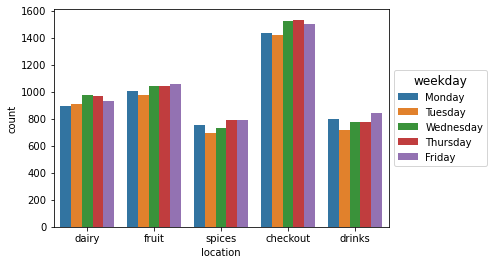

In [14]:
# plotting
sns.countplot(x=df.location, hue=df.weekday)
plt.legend(loc='center left',bbox_to_anchor=(1,0.5),title='weekday',title_fontsize=12); 

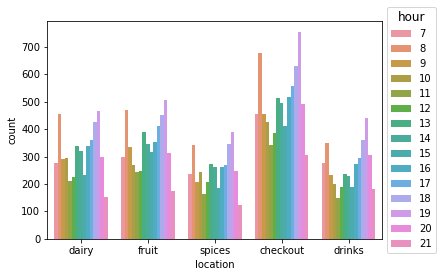

In [15]:
sns.countplot(x=df.location, hue=df.hour)
plt.legend(loc='center left',bbox_to_anchor=(1,0.5),title='hour',title_fontsize=12);